# OCR with Tesseract

### References:

- <a href="https://numpy.org/">NumPy</a>

- <a href="https://tesseract-ocr.github.io/tessdoc/Home.html">Tesseract User Manual</a>

In [1]:
import img2text as i2t

In [2]:
img_dir = 'pages/'
clipped_dir = img_dir + 'clipped/'

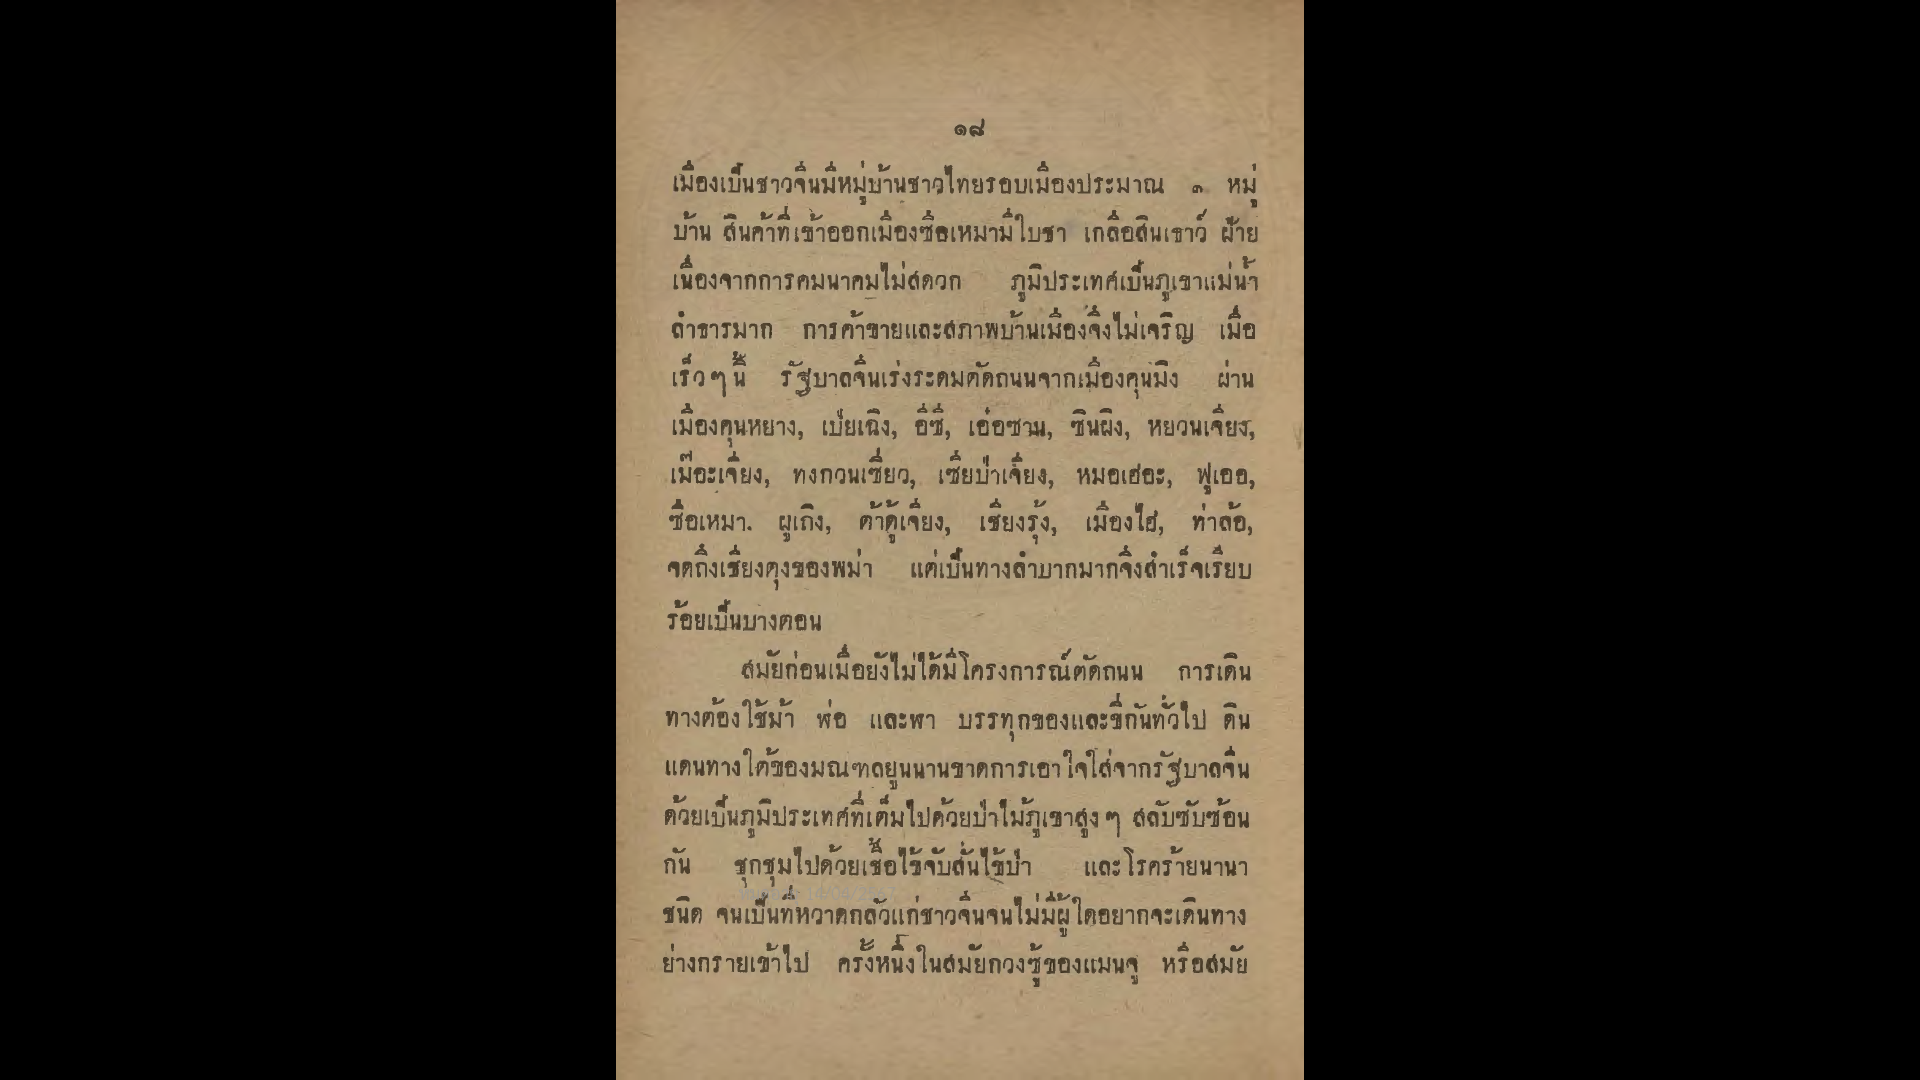

In [3]:
im = i2t.load_image(img_dir + 'page43.png', 0)
im

## Task 1: Clip black edges for good

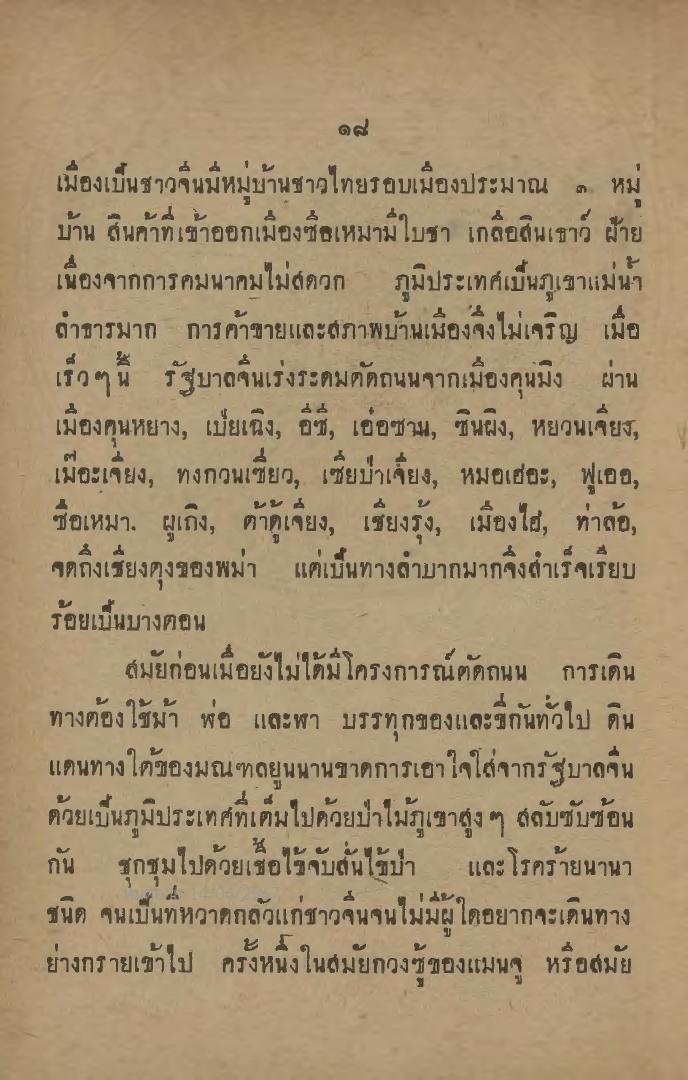

In [8]:
i2t.clip_sides_3d(im)

(1080, 1920, 3)
616
1304
(1080, 688, 3)


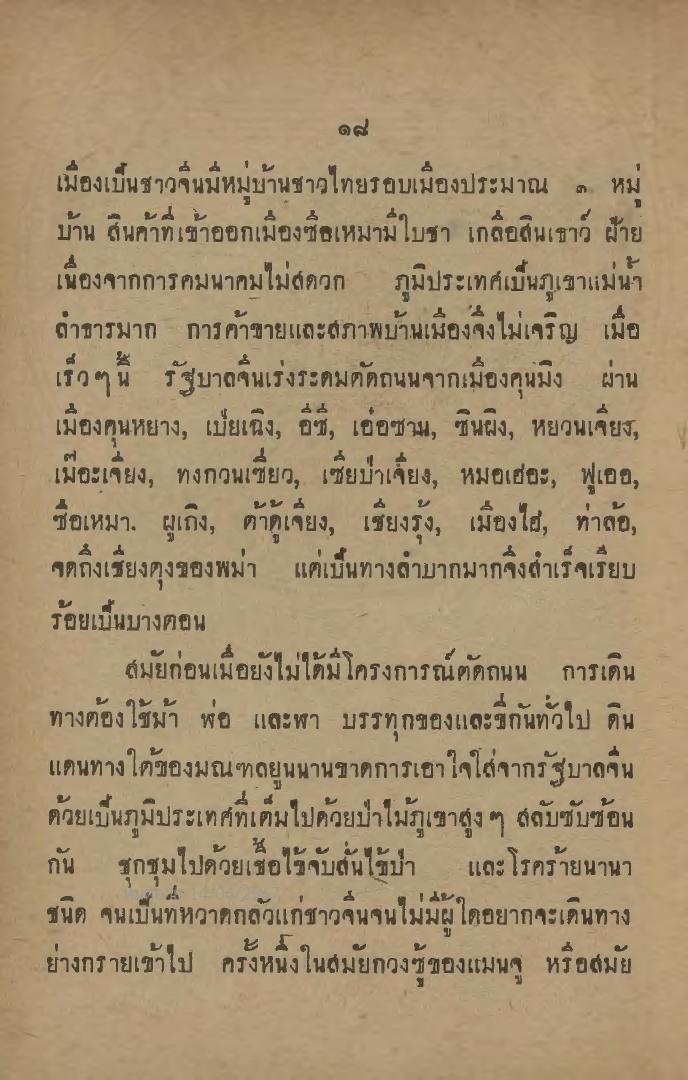

In [56]:
array = i2t.np.asarray(im).copy()

print(array.shape)

i = 0
while not array[:,i,:].sum():  # black row
    i += 1
left = i
print(left)
while i < array.shape[1] and array[:,i,:].sum():  # non-black row
    i += 1
right = i if i > left else array.shape[1] - 1
print(right)

array = array[:, left:right, :]
print(array.shape)

im = i2t.Image.fromarray(array)
im

(688, 1080)
0
688
(688, 1080)


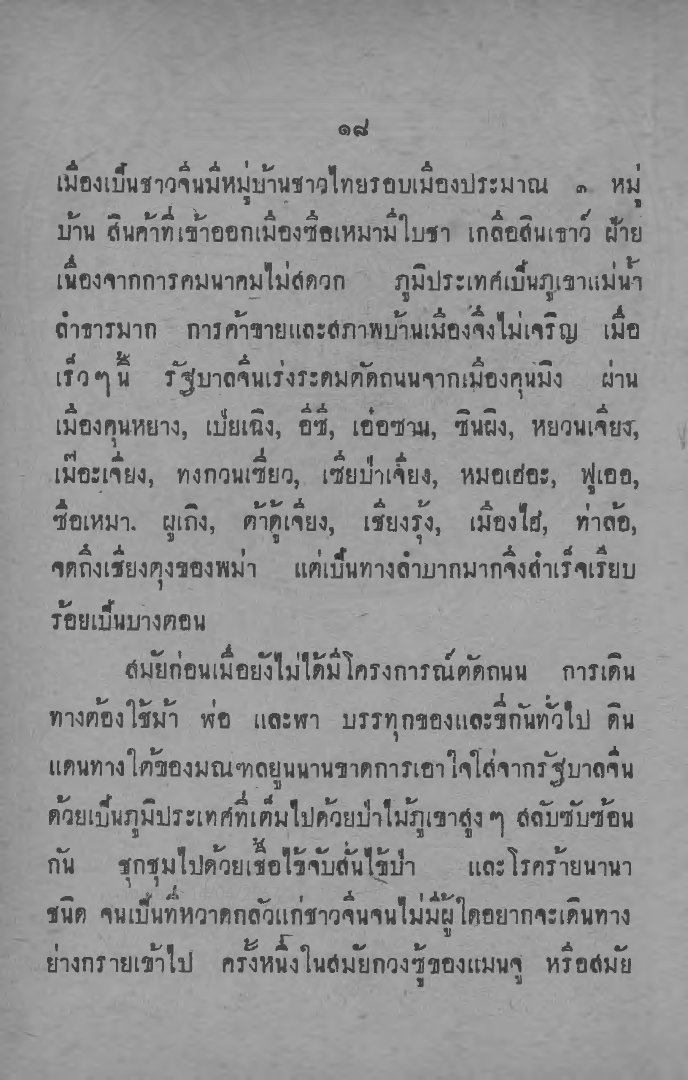

In [26]:
array = i2t.np.asarray(im).copy()

array = array.T
print(array.shape)

i = 0
while not array[i].sum():  # black row
    i += 1
top = i
print(top)
while i < array.shape[0] and array[i].sum():  # non-black row
    i += 1
bottom = i if i > top else array.shape[0] - 1
print(bottom)

array = array[top:bottom]
print(array.shape)

im = i2t.Image.fromarray(array.T)
im

In [9]:
clipped_dir = 'pages/clipped_RGB/'
if not i2t.os.access(clipped_dir, i2t.os.F_OK):
    i2t.os.mkdir(clipped_dir)

print('Processing:')
for file in i2t.os.scandir(img_dir):
    if file.name.endswith('.png'):
        name = file.name
        pn = name[4:len(name)-4]
        print(pn, '\t', end='')
        name = name.replace(f'{pn}.', f'_{pn.zfill(3)}.')
        im = i2t.load_image(file.path, 0)
        im = i2t.clip_sides_3d(im)
        im.save(clipped_dir + name)
        
print()

Processing:
1 	10 	100 	101 	102 	103 	104 	105 	106 	107 	108 	109 	11 	110 	111 	112 	113 	114 	115 	116 	117 	118 	119 	12 	120 	121 	122 	123 	124 	125 	126 	127 	128 	129 	13 	130 	131 	132 	133 	134 	135 	136 	137 	138 	139 	14 	140 	141 	142 	143 	144 	145 	146 	147 	148 	149 	15 	150 	151 	152 	153 	154 	155 	156 	157 	158 	159 	16 	160 	161 	162 	163 	164 	165 	166 	167 	168 	169 	17 	170 	171 	172 	173 	174 	175 	176 	177 	178 	179 	18 	180 	181 	182 	183 	184 	185 	186 	187 	188 	189 	19 	190 	191 	192 	193 	194 	195 	196 	197 	198 	199 	2 	20 	200 	201 	202 	203 	204 	205 	206 	207 	208 	209 	21 	210 	211 	212 	213 	214 	215 	216 	217 	218 	219 	22 	220 	221 	222 	223 	224 	225 	226 	227 	228 	229 	23 	230 	231 	232 	233 	234 	235 	236 	237 	238 	239 	24 	240 	241 	242 	243 	244 	245 	246 	247 	248 	249 	25 	250 	251 	252 	253 	254 	255 	256 	257 	258 	259 	26 	260 	261 	262 	263 	264 	265 	266 	267 	268 	269 	27 	270 	271 	272 	273 	274 	275 	276 	277 	278 	279 	28 	280 	2

## Task 2. Get bounding boxes for lines of text on each page. 

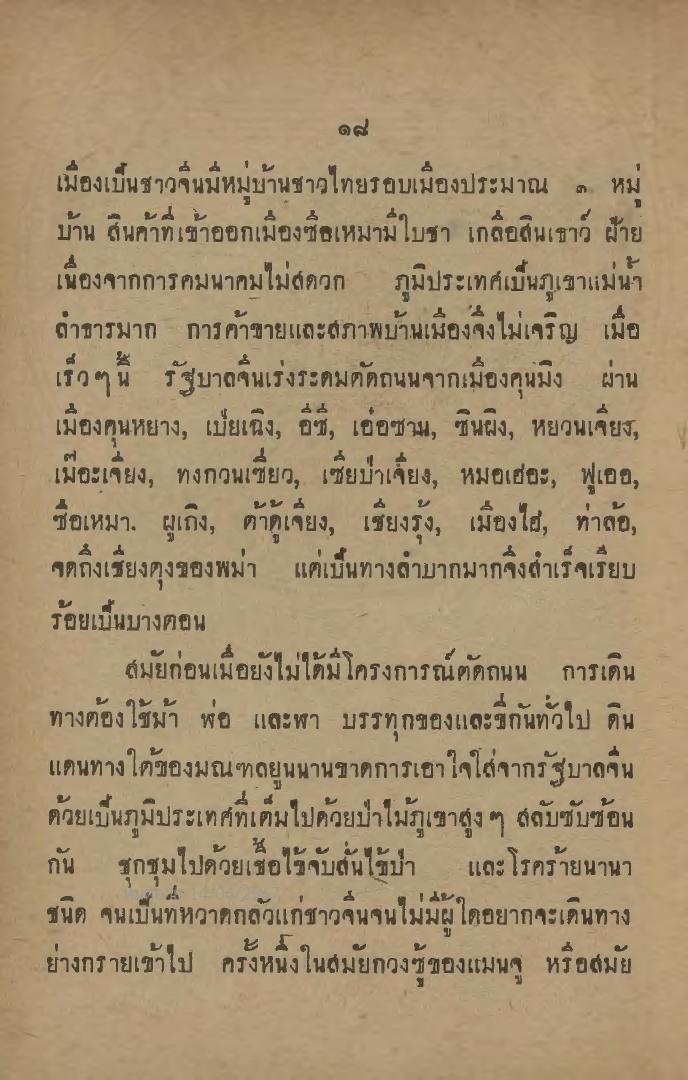

In [4]:
clipped_dir = 'pages/clipped_RGB/'
im = i2t.Image.open(clipped_dir + 'page_043.png')
im

In [5]:
im.getextrema()

((47, 202), (32, 183), (10, 154))

In [8]:
print(i2t.pytesseract.image_to_data(im.convert('L'), lang='tha', config='--psm 3', output_type='string'))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	688	1080	-1	
2	1	1	0	0	0	338	118	31	19	-1	
3	1	1	1	0	0	338	118	31	19	-1	
4	1	1	1	1	0	338	118	31	19	-1	
5	1	1	1	1	1	338	124	13	12	96.885551	๑
5	1	1	1	1	2	353	118	16	19	81.072105	๕
2	1	2	0	0	0	48	153	594	747	-1	
3	1	2	1	0	0	48	153	594	747	-1	
4	1	2	1	1	0	66	153	367	26	-1	
5	1	2	1	1	1	66	160	12	11	50.017376	2
5	1	2	1	1	2	111	153	16	26	46.446388	ณั
5	1	2	1	1	3	179	161	11	11	71.459900	ณ
5	1	2	1	1	4	209	161	12	11	18.783463	2
5	1	2	1	1	5	245	161	3	7	88.191292	!
5	1	2	1	1	6	254	153	11	26	37.161617	๒
5	1	2	1	1	7	264	163	10	9	77.039452	๒
5	1	2	1	1	8	421	161	12	11	59.117310	๑
4	1	2	1	2	0	57	159	584	53	-1	
5	1	2	1	2	1	57	174	17	18	93.300278	เม
5	1	2	1	2	2	74	161	9	48	69.975220	ื
5	1	2	1	2	3	83	176	8	16	79.253540	อ
5	1	2	1	2	4	95	176	7	16	97.017136	ง
5	1	2	1	2	5	105	177	17	16	93.206451	เป
5	1	2	1	2	6	127	177	7	16	93.288353	็
5	1	2	1	2	7	134	161	9	48	97.020638	น
5	1	2	1	2	8	143	176	20	18	96.610275	ชา
5

In [9]:
help(i2t.pytesseract.image_to_data)

Help on function image_to_data in module pytesseract.pytesseract:

image_to_data(image, lang=None, config='', nice=0, output_type='string', timeout=0, pandas_config=None)
    Returns string containing box boundaries, confidences,
    and other information. Requires Tesseract 3.05+



 - thresholding method: None, threshold set to 104


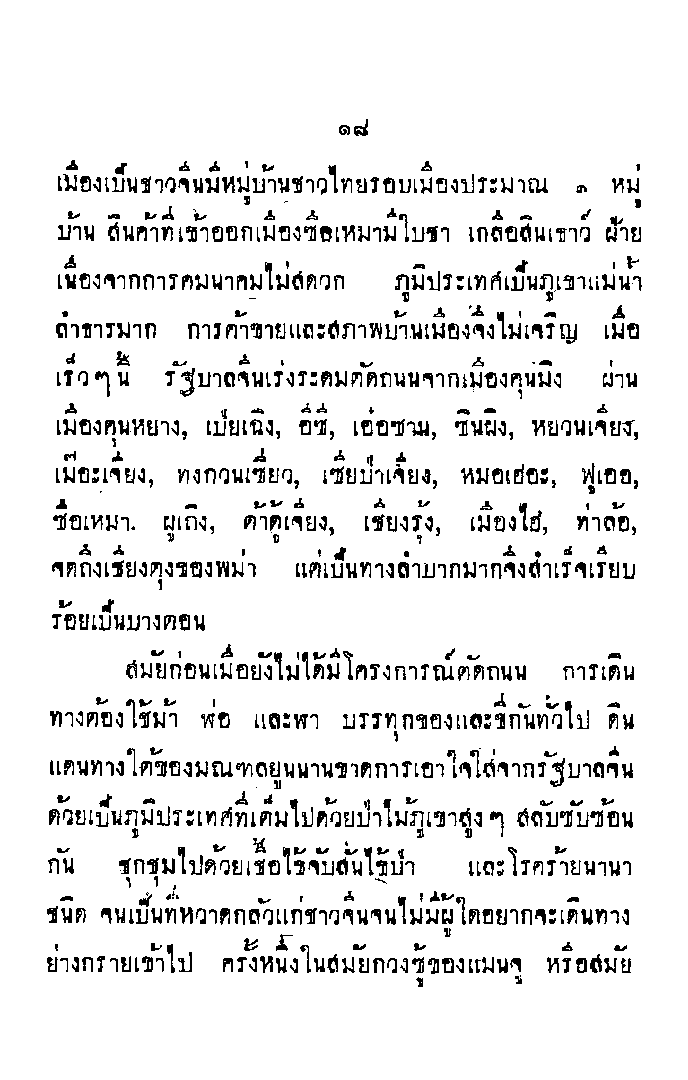

In [137]:
bim = i2t.binarize_as_array(im, t_factor=2.1)
bim

Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 12.57', 'Script: Thai', 'Script confidence: 24.44', '']


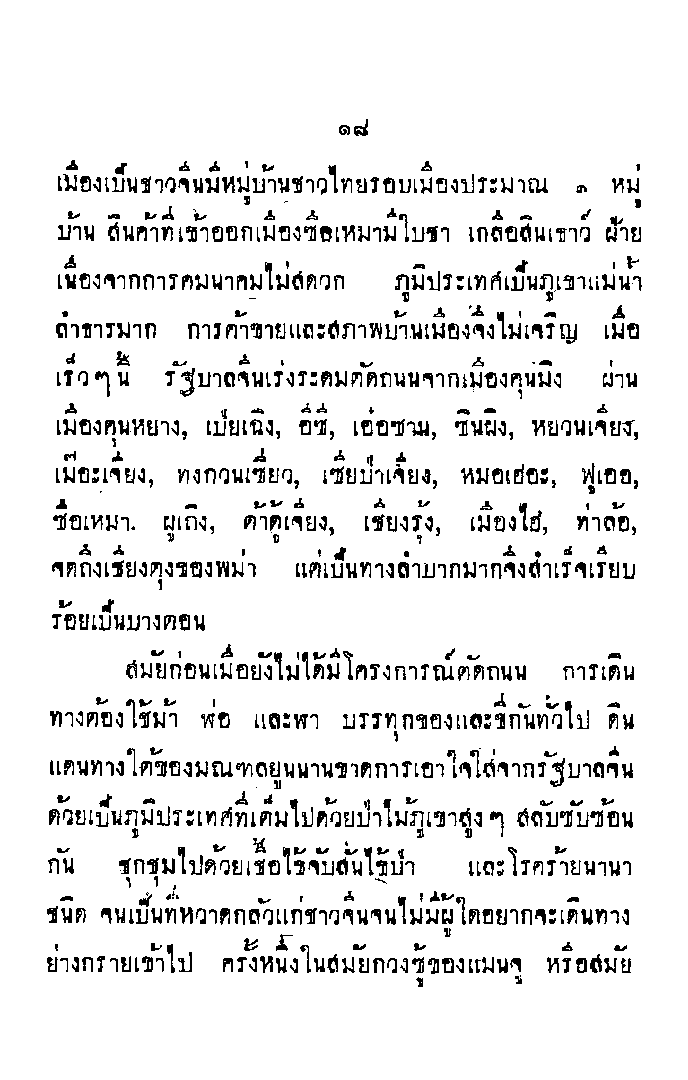

In [138]:
i2t.tesseract_osd(bim)

bool
(1080, 688)


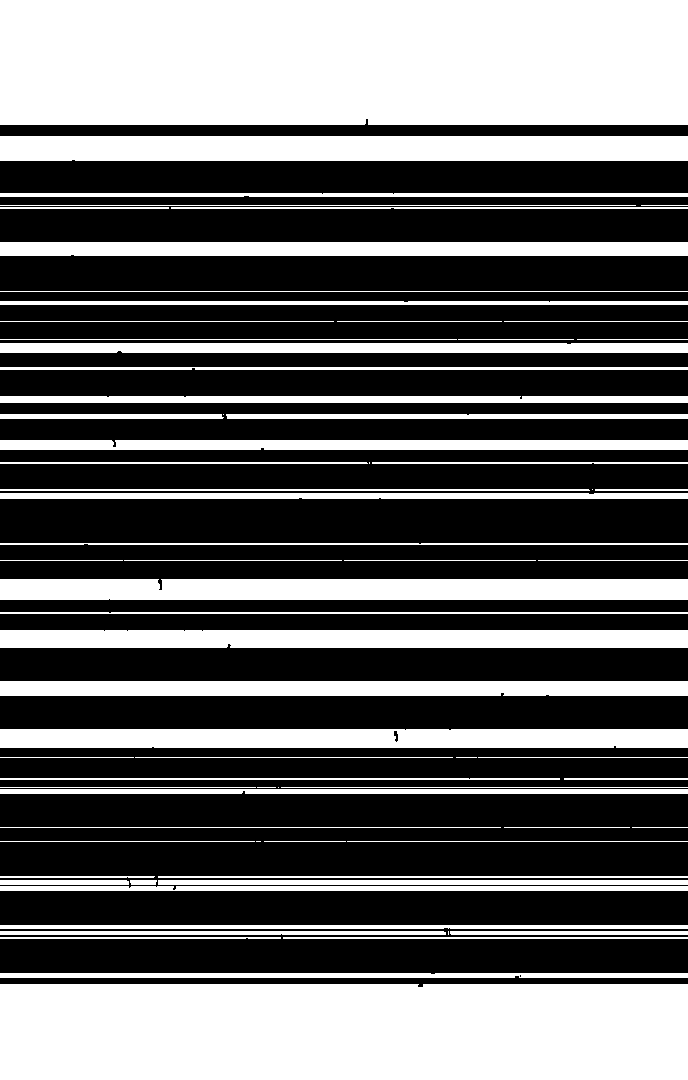

In [130]:
array = i2t.np.asarray(im).copy()
print(array.dtype)

print(array.shape)
for i in range(array.shape[0]):
    if array[i].mean() < .992:
        array[i] = False

i2t.Image.fromarray(array)

uint8
(1080, 688)


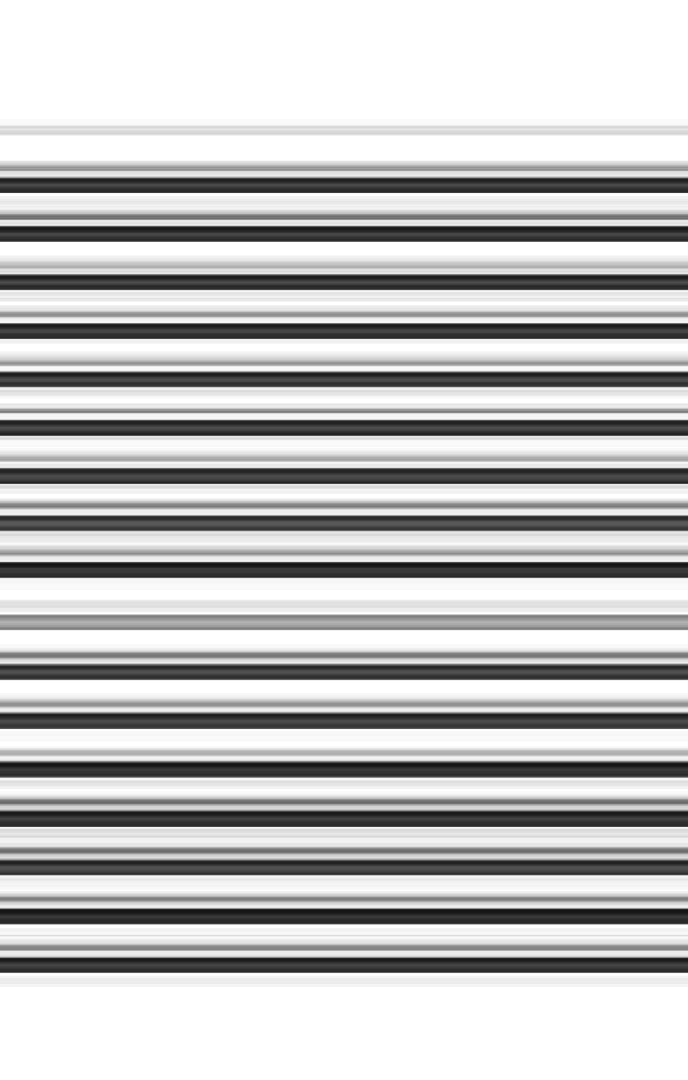

In [139]:
array = i2t.np.asarray(bim, dtype=i2t.np.uint8).copy()
print(array.dtype)

print(array.shape)
for i in range(array.shape[0]):
    array[i] = int(255 ** array[i].mean())

i2t.Image.fromarray(array)

In [159]:
sim = bim.copy()
i2t.segment(sim, threshold=.035, gap=8)

[(0, 148, 688, 208),
 (0, 196, 688, 257),
 (0, 246, 688, 305),
 (0, 295, 688, 354),
 (0, 343, 688, 403),
 (0, 392, 688, 451),
 (0, 439, 688, 499),
 (0, 485, 688, 547),
 (0, 533, 688, 593),
 (0, 598, 688, 645),
 (0, 635, 688, 695),
 (0, 684, 688, 744),
 (0, 734, 688, 793),
 (0, 781, 688, 842),
 (0, 831, 688, 891),
 (0, 879, 688, 940),
 (0, 928, 688, 988)]

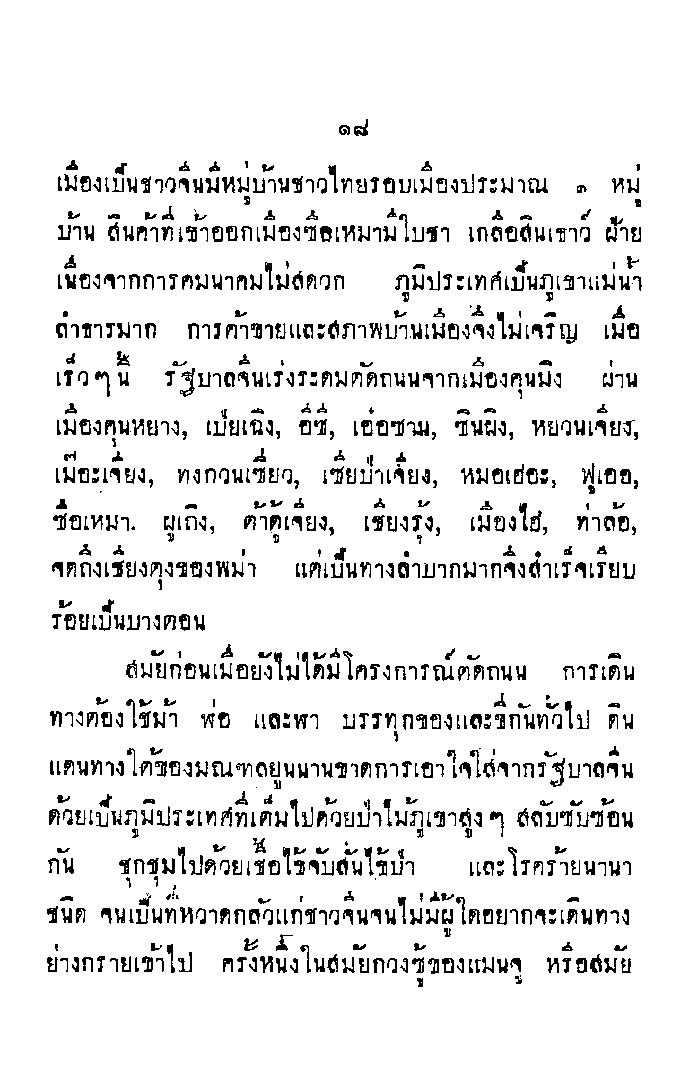

In [95]:
im